In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import *
import skimage.filters
from utilities import *
from synthetic_image import *
from mask_generator import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

import multiprocessing
num_cores = multiprocessing.cpu_count()
from joblib import parallel_backend, Parallel, delayed
from dask.distributed import Client
client = Client()

import glob
import random
import os
random.seed(a=10)

%matplotlib widget

distributed.diskutils - INFO - Found stale lock file and directory '/home/sommer/Documents/IR/CLOUD_DETECTION/infrared-cloud-detection/dask-worker-space/worker-c1o9qbh3', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/sommer/Documents/IR/CLOUD_DETECTION/infrared-cloud-detection/dask-worker-space/worker-g_moiksp', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/sommer/Documents/IR/CLOUD_DETECTION/infrared-cloud-detection/dask-worker-space/worker-vsc5yw9m', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/sommer/Documents/IR/CLOUD_DETECTION/infrared-cloud-detection/dask-worker-space/worker-je9ad_ag', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/sommer/Documents/IR/CLOUD_DETECTION/infrared-cloud-detection/dask-worker-space/worker-rshvbtg_', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/sommer/Documents/IR/CLOUD_DETEC

#### **Open FITS image with astropy and get shape**

In [2]:
image = fits.getdata('clear_sky_sample.fits')


#### **Simulate synthetic clear sky image with noise**

In [3]:
syn, noise_syn = simulate_clear_sky_image(start=600, stop=650, width=640, height=512, is_horizontal=True, bias_level=300, read_noise_level = 5, bad_pixel_columns = 50, sky_noise_level = 10, return_original = True)

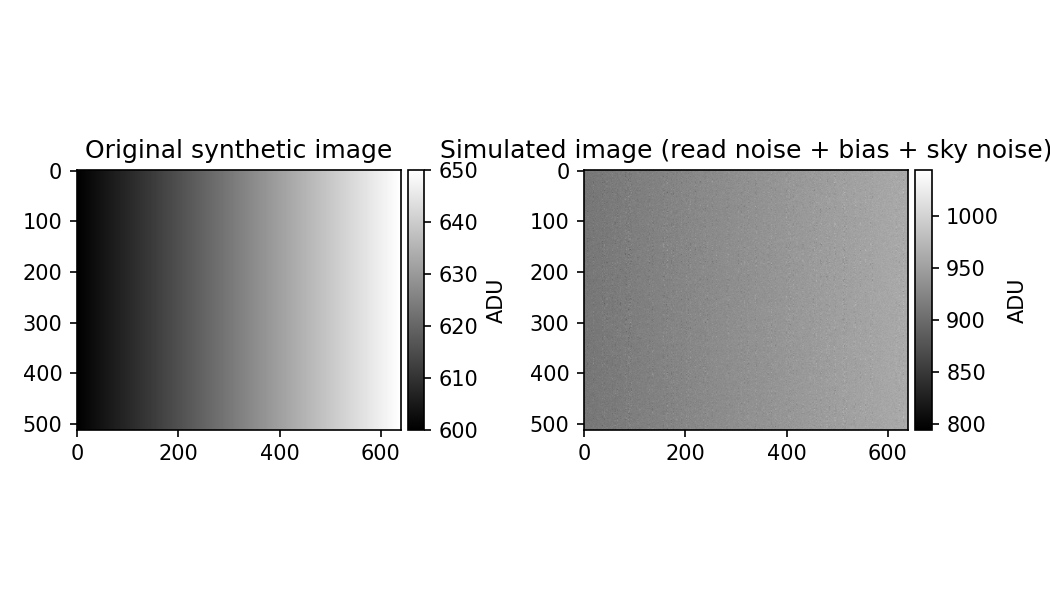

In [4]:
plot_synthetic_noisy_images(syn=syn, noisy=noise_syn, cmap='gray')

#### **Apply Narcissus effect to the synthetic image**

In [5]:
nar_syn = apply_narcissus_effect(noise_syn, radius = 160, center_x = 320, center_y = 256, smoothness = 80, intensity = 0.025)

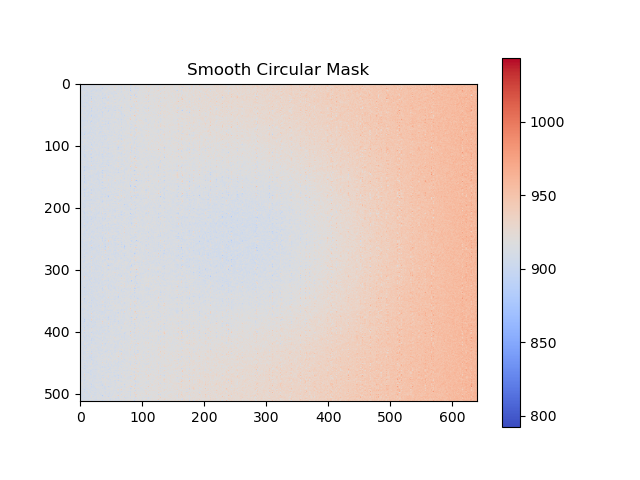

In [6]:
plt.figure()
# Display the circular mask
plt.imshow(nar_syn, cmap='coolwarm')
plt.title("Smooth Circular Mask")
plt.colorbar()
plt.show()